In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
import numpy as np

dataset = load_breast_cancer()
X, y = dataset.data, dataset.target


In [6]:
dataset

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [7]:
X_norm = StandardScaler().fit(X).transform(X)
X_norm[0:5]

array([[ 1.09706398e+00, -2.07333501e+00,  1.26993369e+00,
         9.84374905e-01,  1.56846633e+00,  3.28351467e+00,
         2.65287398e+00,  2.53247522e+00,  2.21751501e+00,
         2.25574689e+00,  2.48973393e+00, -5.65265059e-01,
         2.83303087e+00,  2.48757756e+00, -2.14001647e-01,
         1.31686157e+00,  7.24026158e-01,  6.60819941e-01,
         1.14875667e+00,  9.07083081e-01,  1.88668963e+00,
        -1.35929347e+00,  2.30360062e+00,  2.00123749e+00,
         1.30768627e+00,  2.61666502e+00,  2.10952635e+00,
         2.29607613e+00,  2.75062224e+00,  1.93701461e+00],
       [ 1.82982061e+00, -3.53632408e-01,  1.68595471e+00,
         1.90870825e+00, -8.26962447e-01, -4.87071673e-01,
        -2.38458552e-02,  5.48144156e-01,  1.39236330e-03,
        -8.68652457e-01,  4.99254601e-01, -8.76243603e-01,
         2.63326966e-01,  7.42401948e-01, -6.05350847e-01,
        -6.92926270e-01, -4.40780058e-01,  2.60162067e-01,
        -8.05450380e-01, -9.94437403e-02,  1.80592744e+

In [8]:
X_train, X_test, y_train, y_test = train_test_split( X_norm, y, test_size=0.2, random_state=4)

In [ ]:
LR = LogisticRegression().fit(X_train,y_train)
yhat = LR.predict(X_test)
yhat[:10]
yhat_prob = LR.predict_proba(X_test)
yhat_prob[:10]

array([[3.88463703e-01, 6.11536297e-01],
       [1.84922148e-04, 9.99815078e-01],
       [9.99999998e-01, 1.53890423e-09],
       [9.99273957e-01, 7.26043174e-04],
       [5.92070906e-01, 4.07929094e-01],
       [6.08370774e-01, 3.91629226e-01],
       [8.14519044e-04, 9.99185481e-01],
       [1.38544616e-04, 9.99861455e-01],
       [7.66818846e-01, 2.33181154e-01],
       [4.08780384e-01, 5.91219616e-01]])

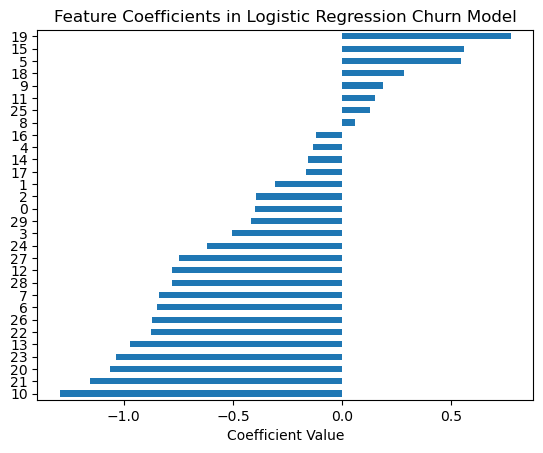

In [13]:
coefficients = pd.Series(LR.coef_[0])
coefficients.sort_values().plot(kind='barh')
plt.title("Feature Coefficients in Logistic Regression Churn Model")
plt.xlabel("Coefficient Value")
plt.show()

In [ ]:
threshold = 0.8
y_predicted = np.array([p[1]>threshold for p in yhat_prob])
pd.crosstab(y_test, y_predicted)

col_0,False,True
row_0,,
0,34,0
1,12,68


In [39]:
print(f"True positif (TP): {68}")
print(f"True negatif (TN): {34}")
print(f"False positif (FP): {0}")
print(f"False negatif (FN): {12}")
print("-------------------------------------------------------------------")
print(f"Precision (TP/TP+FN): {68/(68+12)}")
print(f"Specificity ((TN)/(TN+FP)): {(34)/(34+0)}")
print("-------------------------------------------------------------------")
print(f"Recall (TP/TP+FN): {0.85/(0.85+0.15)}")
print(f"F1 ((2*precision*recall)/(precision+recall)): {2*1*0.85/(0.85+1)}")
print(f"Accuracy ((TF+TN)/(TP+TN+FP+FN)): {(0.85+1)/(0.85+1+0.15)}")

True positif (TP): 68
True negatif (TN): 34
False positif (FP): 0
False negatif (FN): 12
-------------------------------------------------------------------
Precision (TP/TP+FN): 0.85
Specificity ((TN)/(TN+FP)): 1.0
-------------------------------------------------------------------
Recall (TP/TP+FN): 0.85
F1 ((2*precision*recall)/(precision+recall)): 0.9189189189189189
Accuracy ((TF+TN)/(TP+TN+FP+FN)): 0.925


## Log Loss: 

Log loss (Logarithmic loss), also known as Binary Cross entropy loss, is a function that generates a loss value based on the class wise prediction probabilities and the actual class labels. The lower the log loss value, the better the model is considered to be.

In [14]:
log_loss(y_test, yhat_prob)

0.07828821901473688